In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Energy_consumption.csv")

In [ ]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [6]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [7]:
df.head().T

,0,1,2,3,4
Timestamp,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00
Temperature,25.139433,27.731651,28.704277,20.080469,23.097359
Humidity,43.431581,54.225919,58.907658,50.371637,51.401421
SquareFootage,1565.693999,1411.064918,1755.715009,1452.316318,1094.130359
Occupancy,5,1,2,1,9
HVACUsage,On,On,Off,Off,On
LightingUsage,Off,On,Off,On,Off
RenewableEnergy,2.774699,21.831384,6.764672,8.623447,3.071969
DayOfWeek,Monday,Saturday,Sunday,Wednesday,Friday
Holiday,No,No,No,No,No


In [8]:
df.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 93.8+ KB


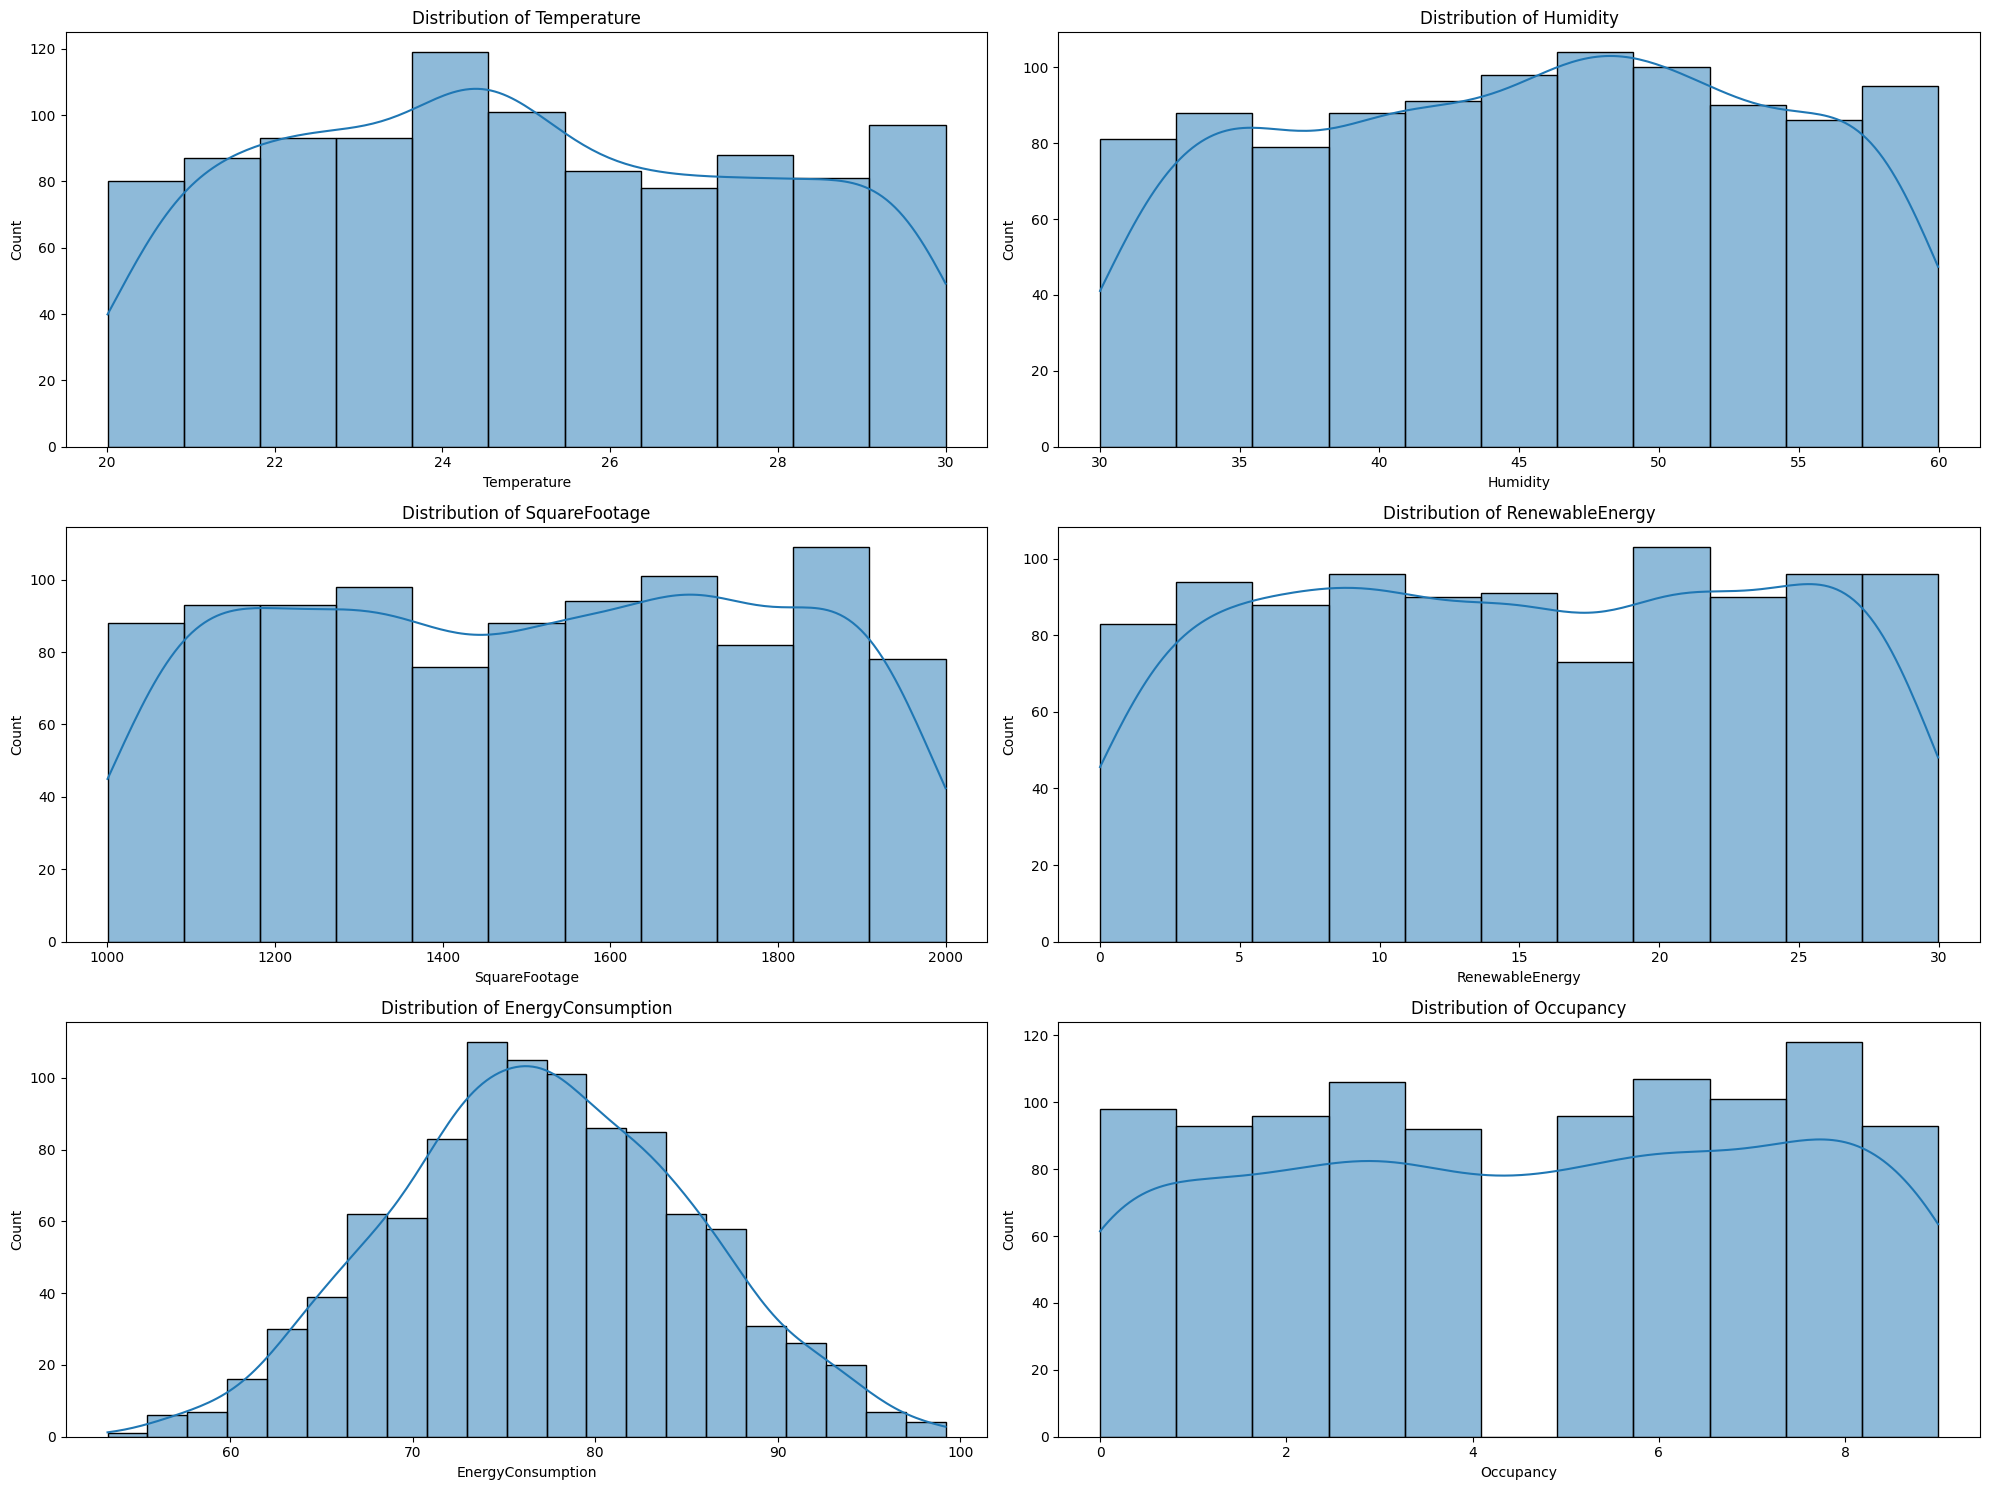

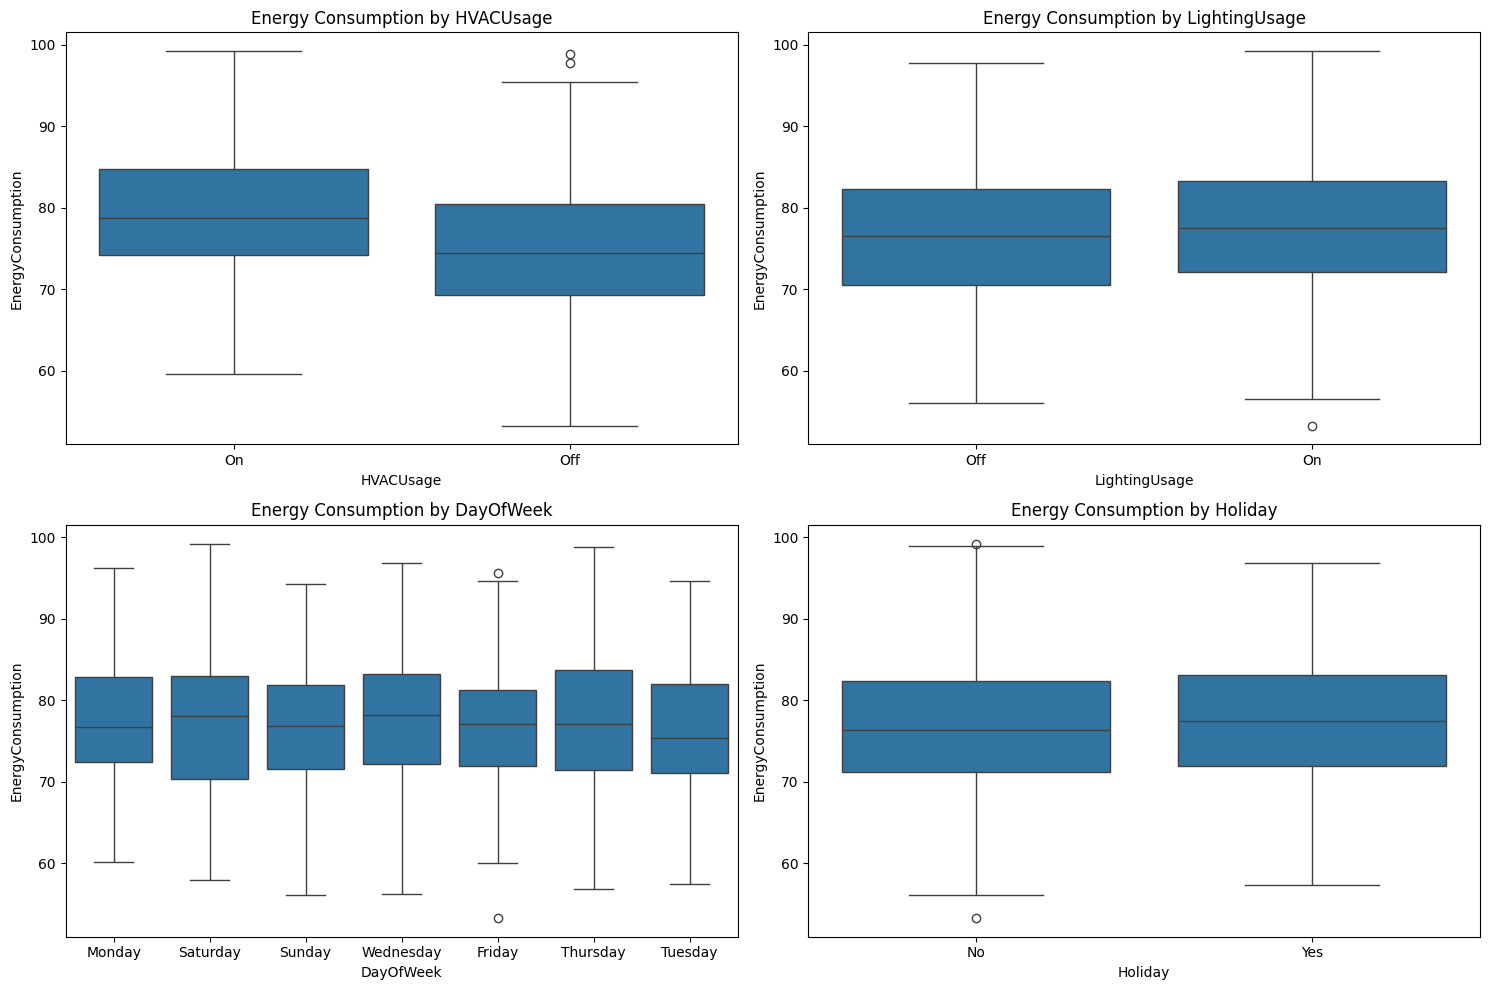

<ipython-input-15-e20b53704e82>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(energy_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')


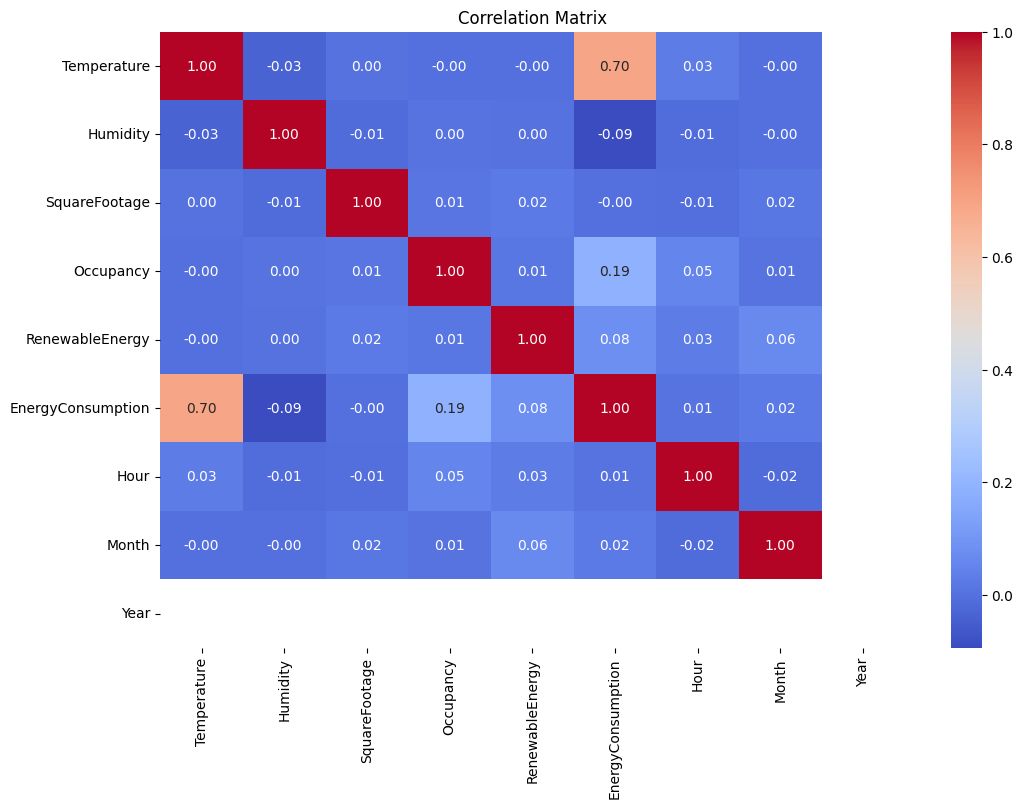

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
energy_data = pd.read_csv("/content/Energy_consumption.csv")
# Convert Timestamp to datetime and create additional time-based features
energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'])
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['Month'] = energy_data['Timestamp'].dt.month
energy_data['Year'] = energy_data['Timestamp'].dt.year

# Overview of data distribution
plt.figure(figsize=(20, 15))

# Histograms for numerical features
num_features = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption', 'Occupancy']
for i, feature in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(energy_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots for categorical features
plt.figure(figsize=(15, 10))
cat_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
for i, feature in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=feature, y='EnergyConsumption', data=energy_data)
    plt.title(f'Energy Consumption by {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(energy_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Model Hyperparameter Tunning

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded into energy_data DataFrame
energy_data = pd.read_csv("Energy_consumption.csv")
# Dropping the 'Timestamp' column
energy_data_ml = energy_data.drop(columns=['Timestamp'])

# Splitting the data into train, validation, and test sets
df_full_train, df_test = train_test_split(energy_data_ml, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Separating features and target variable for each set
X_train = df_train.drop('EnergyConsumption', axis=1)
y_train = df_train['EnergyConsumption']

X_val = df_val.drop('EnergyConsumption', axis=1)
y_val = df_val['EnergyConsumption']

X_test = df_test.drop('EnergyConsumption', axis=1)
y_test = df_test['EnergyConsumption']

# Defining categorical and numerical features
categorical_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

# Hyperparameters for tuning
param_grid = {
    'LinearRegression': {},
    'DecisionTree': {'model__max_depth': [10, 20, 30], 'model__min_samples_split': [2, 5]},
    'RandomForest': {'model__n_estimators': [100, 200], 'model__max_depth': [10, 20, 30]},
    'XGBoost': {'model__learning_rate': [0.1, 0.2], 'model__max_depth': [3, 5], 'model__n_estimators': [100, 200]}
}

# Results dictionary
results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model_name, model, param_grid, X_train, y_train, X_val, y_val):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'R2': r2
    }

# Training and evaluating each model
for model_name in models.keys():
    train_and_evaluate_model(model_name, models[model_name], param_grid[model_name], X_train, y_train, X_val, y_val)

# Print the results
for model_name, result in results.items():
    print(model_name)
    print("Best Parameters:", result['Best Parameters'])
    print("Mean Squared Error:", result['MSE'])
    print("R^2 Score:", result['R2'])
    print("\n")


LinearRegression
Best Parameters: {}
Mean Squared Error: 25.237107563951767
R^2 Score: 0.5800788036495226


DecisionTree
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5}
Mean Squared Error: 52.77981250755134
R^2 Score: 0.12179468446762087


RandomForest
Best Parameters: {'model__max_depth': 30, 'model__n_estimators': 100}
Mean Squared Error: 28.61393608528575
R^2 Score: 0.5238916249502318


XGBoost
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Mean Squared Error: 29.151521467585606
R^2 Score: 0.5149467212482588




In [7]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction import DictVectorizer
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s: %(message)s")

# Reading the data
logging.info("Reading the data...")
energy_data = pd.read_csv('Energy_consumption.csv')

# Dropping the 'Timestamp' column
df = energy_data.drop(columns=['Timestamp'])

# Splitting the data into train, validation, and test sets
logging.info("Splitting the data into train, validation, and test sets...")
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# # Separating features and target variable for each set
# X_train = df_train.drop('EnergyConsumption', axis=1)
# y_train = df_train['EnergyConsumption']
# X_val = df_val.drop('EnergyConsumption', axis=1)
# y_val = df_val['EnergyConsumption']
# X_test = df_test.drop('EnergyConsumption', axis=1)
# y_test = df_test['EnergyConsumption']

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.EnergyConsumption.values
y_val = df_val.EnergyConsumption.values
y_test = df_test.EnergyConsumption.values

del df_train['EnergyConsumption']
del df_val['EnergyConsumption']
del df_test['EnergyConsumption']

# Define categorical and numerical features
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
numerical_features.remove("EnergyConsumption")

# Preprocess categorical features if necessary (e.g., one-hot encoding)
# You may need to apply encoding/normalization to categorical features here

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# Transform categorical and numerical features
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Exporting the model
logging.info("Exporting the model...")
with open('model.bin', 'wb') as f:
    pickle.dump((model, dv), f)

logging.info("Model exported successfully.")

2024-01-25 22:08:21,999 - INFO: Reading the data...


2024-01-25 22:08:22,073 - INFO: Splitting the data into train, validation, and test sets...
2024-01-25 22:08:22,308 - INFO: Exporting the model...
2024-01-25 22:08:22,311 - INFO: Model exported successfully.


In [3]:

import joblib

# Find the model with the highest R2 score
best_model_name = max(results, key=lambda k: results[k]['R2'])

# Retrieve the best model
best_model = models[best_model_name]

# Train the best model on the full training data (train + validation)
best_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])
best_model_pipeline.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Save the model
joblib.dump(best_model_pipeline, 'model.bin')

print(f"Saved the best model ({best_model_name}) to 'model.bin'")


Saved the best model (LinearRegression) to 'model.bin'


In [11]:
best_model_name

'LinearRegression'

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')


In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
y_pred

array([0.20924638, 0.20894817, 0.21140182, ..., 0.21157999, 0.21037125,
       0.21034882])

In [ ]:
exited = (y_pred >= 0.5)


In [ ]:
(exited == y_test).mean()


0.7875299178962039

In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

# Decision classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6106720938869248

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9999800789025508

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7980005285771269
val: 0.7994970100609132


In [ ]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.690
   2 -> 0.775
   3 -> 0.799
   4 -> 0.806
   5 -> 0.806
   6 -> 0.805
  10 -> 0.794
  15 -> 0.743
  20 -> 0.661
None -> 0.613


In [ ]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.806  0.806  0.805
5                 0.806  0.806  0.805
10                0.806  0.806  0.805
15                0.806  0.806  0.805
20                0.806  0.806  0.805
100               0.806  0.806  0.805
200               0.806  0.806  0.806
500               0.806  0.806  0.806

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

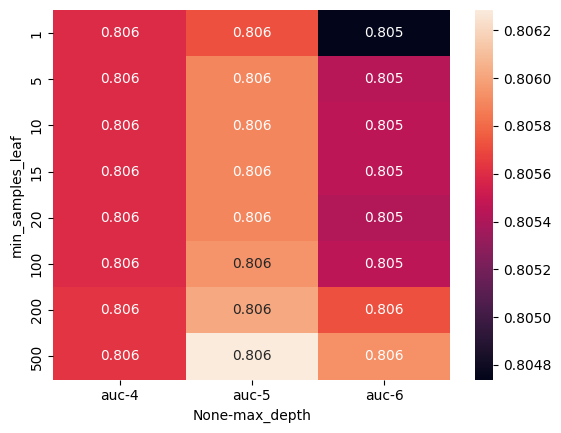

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])


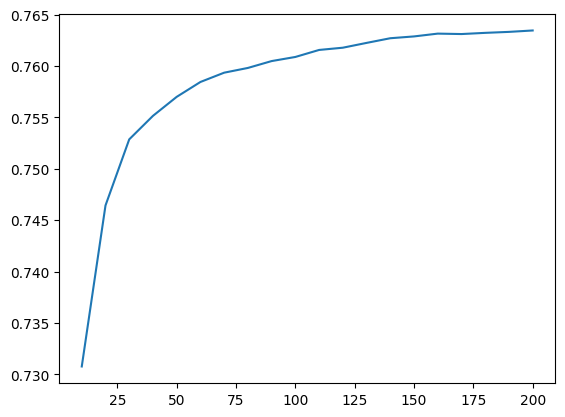

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.auc)


In [ ]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()


In [ ]:
max_depth = 10

In [ ]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()